# Logistic Regression Demonstration

In this tutorial we will demonstrate how to use the `LogisticRegression` class in `scikit-learn` to perform logistic regression on a dataset. We will also demonstrate `predict_proba`. 

Import modules

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(1)

Load data (it's already cleaned and preprocessed)

In [3]:
# Uncomment the following snippet of code to debug problems with finding the .csv file path
# This snippet of code will exit the program and print the current working directory.
#import os
#print(os.getcwd())

In [4]:
df = pd.read_csv('logistic_example01.csv')
df.head(3)

,kgs_smoked,cancer
0,-0.659560,0
1,5.781490,0
2,-8.247713,0


In [5]:
X = df[['kgs_smoked']]
y = df[['cancer']]

Fit a logistic regression model

In [6]:
log_reg = LogisticRegression().fit(X, np.ravel(y))


Add a column to the dataframe with the predicted values

In [7]:
df['predicted'] = log_reg.predict(X)
df.head(3)

,kgs_smoked,cancer,predicted
0,-0.659560,0,0
1,5.781490,0,1
2,-8.247713,0,0


Add a column of the probabilities of being a 1

In [8]:
df['pred_prob'] = log_reg.predict_proba(X)[:,1]
df.head(10)

,kgs_smoked,cancer,predicted,pred_prob
0,-0.659560,0,0,0.304901
1,5.781490,0,1,0.715810
2,-8.247713,0,0,0.052991
3,-1.828349,0,0,0.242095
4,-4.564882,0,0,0.131952
5,-5.278228,0,0,0.111314
6,-3.024796,0,0,0.187567
7,0.536215,0,0,0.377639
8,1.935349,0,0,0.470057
9,5.151335,0,1,0.679783


Display the probabilities and the predicted values

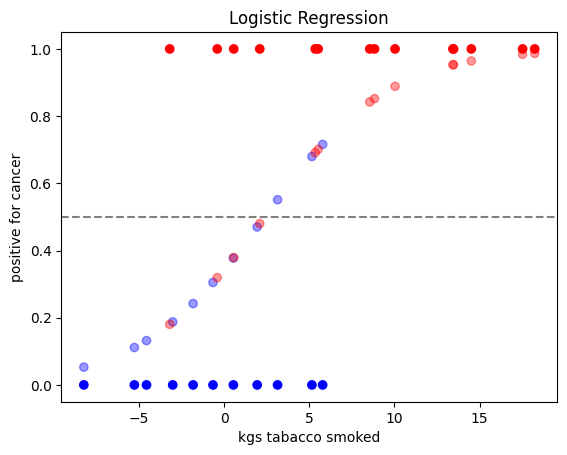

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
#ax.scatter(X, y, c=y.iloc[:,0])
colors = np.array(["blue", "red"])
ax.scatter(X, y, c=colors[np.ravel(y)])
ax.scatter(X, df['pred_prob'], c=colors[np.ravel(y)], alpha=0.4)
plt.axhline(.5, color="black", label="cutoff", linestyle='--', alpha=.5)
ax.set_xlabel('kgs tabacco smoked')
ax.set_ylabel('positive for cancer')
ax.set_title('Logistic Regression')
plt.show()

Identify the coefficients and intercept.

In [10]:
log_reg.coef_
b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]
r2 = log_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x1")
print(f"R^2: {r2:.3f}")

Y = -0.65 + 0.27x1
R^2: 0.720


## Save the model to disk

Once you train a model, you want to reused it in other notebooks or applications. You can save the model to disk using the `pickle` module.

In [11]:
import pickle

# save model
pickle.dump(log_reg, open('logistic_model_example01.pkl', "wb"))  ## log_reg is my model name and pickle file name will be 'logistic_model....

# If you wish to load this model later, simply use pickle.load method
#loaded_model = pickle.load(open('logistic_model_example01.pkl', "rb"))

## But how do we interpret the coefficients of a logistic regression model?

> NOTE: This section is advanced. I will not test you on this, I only offer this to those who are interested in learning more about the math behind logistic regression.

The b1 coefficient is the change in the log odds of being a 1 for a 1 unit increase in the predictor variable. 

The log odds function is the natural log of the odds. It's also known as the logit function.

> $\log \left(\frac{p}{1-p}\right)=\operatorname{logit}(p)$

Based on the results from our logistic regression above, we can see that the coefficient for `kgs smoked` is 0.27. This means that for a 1 unit increase in kgs smoked, the log odds of being a 1 increases by 0.0.27.
>NOTE: The $\beta_0$ and $\beta_1$ used here are from a specific dataset. If you experiment with other datasets, you will get different values for the coefficients and intercept than you see here. Whatever the new values, the following explanation will still apply.


$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)=1.31+0.27x$

But how to we find the probability of being a 1? We can use the inverse logit function (aka, logistic function).

In [12]:
## Derive the predicted probability from the logistic model


The logit function is defined as

$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)$

The logistic function, is defined as 

$\operatorname{logistic}(p)=\frac{1}{e^{\beta_0+\beta_1x}}$


When we use logistic regression (just as in regular regression), we are trying to find the best values for $\beta_0$ and $\beta_1$ that minimize the error between the predicted values and the actual values. But the interpretation of the coefficients is different.

$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)=\beta_0+\beta_1x$

### Let's take this relationship and derive the function for the probability of being a 1.

Exponentiate and take the multiplicative inverse of both sides, and we get the odds ratio.

$\frac{1-p}{p}=\frac{1}{e^{\beta_0+\beta_1x}}$

Partial out the fraction on the left-hand side of the equation and add one to both sides,

$\frac{1}{p}=1+\frac{1}{e^{\beta_0+\beta_1x}}$

Change 1 to a common denominator

$\frac{1}{p}=\frac{e^{\beta_0+\beta_1 x}+1}{e^{\beta_0+\beta_1 x}}$


Finally, take the multiplicative inverse again to obtain the formula for the probability P(cancer=1)

$p=\frac{e^{\beta_0+\beta_1 x}}{1+e^{\beta_0+\beta_1 x}}$


Now, let's apply our derived formular to the coefficients we obtained from the model. This will result in the probability of being a 1 for a given value of the predictor variable.

In [13]:
p_y_eq_1 = np.exp(b0 + b1 * X) / (1+ np.exp(b0 + b1 * X))
p_y_eq_1

,kgs_smoked
0,0.304901
1,0.715810
2,0.052991
3,0.242095
4,0.131952
5,0.111314
6,0.187567
7,0.377639
8,0.470057
9,0.679783


Notice that these values are the same as the ones produced by the `predict_proba` method.

In [14]:
df.pred_prob

0     0.304901
1     0.715810
2     0.052991
3     0.242095
4     0.131952
5     0.111314
6     0.187567
7     0.377639
8     0.470057
9     0.679783
10    0.551151
11    0.852060
12    0.319384
13    0.952631
14    0.180340
15    0.888729
16    0.691176
17    0.842202
18    0.379013
19    0.480322
20    0.964211
21    0.986673
22    0.701071
23    0.953047
24    0.983877
Name: pred_prob, dtype: float64